Day 1: [0. 1. 0. 0. 0.]
Day 2: [1. 0. 1. 0. 0.]
Day 3: [0. 1. 0. 1. 0.]
Day 4: [1. 0. 1. 0. 1.]
Day 5: [0. 1. 0. 1. 0.]
Day 6: [1. 0. 1. 0. 1.]
Day 7: [0. 1. 0. 1. 0.]
Day 8: [1. 0. 1. 0. 1.]
Day 9: [0. 1. 0. 1. 0.]
Day 10: [1. 0. 1. 0. 1.]
Pinfect:  0.0078125


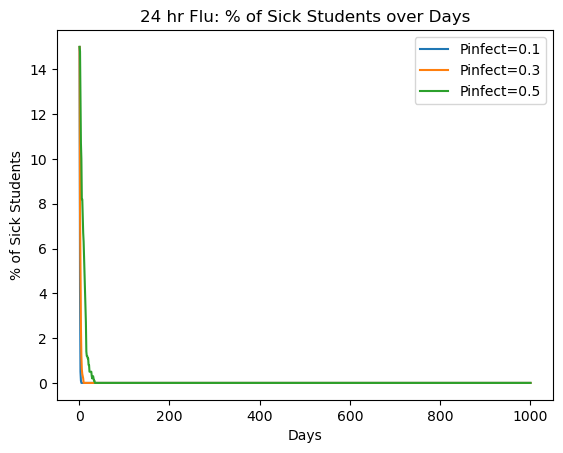

In [38]:
'''
Alex Kramer
DS 5110
Homework 1
Problem 2
'''

import numpy as np
import matplotlib.pyplot as plt

def simulate(N, M, Psick):
    # function simulates flu, taking in number of students, number of days
    # and probability of sick
    
    classroom = np.zeros((M, N)) # create our classroom (students by days)

    # randomly choose who gets sick first
    sick_students = np.random.choice(N, size=int(N * Psick), replace=False) 
    classroom[0, sick_students] = 1 # change the array to include sick students
    
    # in the array, for each day (row) and each student 
    for day in range(1, M):
        for student in range(N):
            # check to see if they were sick the day before
            if classroom[day-1, student] == 1:
                # if they were, make them healthy today
                classroom[day, student] = 0
                # if they were healthy, check to see if their neighbords were sick
                if student > 0 and classroom[day-1, student-1] == 0:
                    classroom[day, student-1] = 1
                if student < N-1 and classroom[day-1, student+1] == 0:
                    classroom[day, student+1] = 1

    return classroom

def pinfect(N, M, Psick):
    
    min_pinfect = 0.0
    max_pinfect = 1.0
    epsilon = 0.01

    while max_pinfect - min_pinfect > epsilon:
        Pinfect = (min_pinfect + max_pinfect) / 2
        classroom = simulate_flu_transmission(N, M, Psick, Pinfect)
        if np.any(classroom[-1] == 1):
            min_pinfect = Pinfect
        else:
            max_pinfect = Pinfect

    return Pinfect

def plot(N, M, Psick, Pinfect_values):
    # function plots the sick students % and the pinfect values
    sick_percentages = []
    
    # calculte the number of students sick in each simulation 
    for Pinfect in Pinfect_values:
        classroom = simulate_flu_transmission(N, M, Psick, Pinfect)
        sick_count = np.sum(classroom, axis=1)
        sick_percentage = (sick_count / N) * 100
        sick_percentages.append(sick_percentage)

    # plot the graph
    plt.figure()
    for i, Pinfect in enumerate(Pinfect_values):
        plt.plot(range(1, M+1), sick_percentages[i], label=f"Pinfect={Pinfect}")
    plt.xlabel("Days")
    plt.ylabel("% of Sick Students")
    plt.title("24 hr Flu: % of Sick Students over Days")
    plt.legend()
    plt.show()
    
def main():
    # 10 days, 5 students
    classroom = simulate(5, 10, 0.2)

    # print the indidivudal days,  day by day to vizulize simulation
    for day in range(10):
        print(f"Day {day+1}: {classroom[day]}")
        
    N = 1000  # number of students
    M = 1000  # number of days to simulate
    Psick = 0.15  # percent of infected students

    # find the Pinfect
    Pinfect_persistent = pinfect(N, M, Psick)
    print('Pinfect: ', Pinfect_persistent)

    # run simulation with the persistent Pinfect and then plot
    classroom = simulate(N, M, Psick)
    Pinfect_values = [0.1, 0.3, 0.5]
    plot(N, M, Psick, Pinfect_values)
    
if __name__ =='__main__':
    main()